In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [78]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(url,header=None)
#header=None : ستون ویژگی هارو عدد گذاری میکنه
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [79]:
headers = ['symboling','normalized-losses','make',
          'fuel-type' ,' aspiration','num-of-doors',
          'body-style','drive-wheels','engine-location',
          'wheel-base','length','width','height','curb-weight',
          'engine-type','num-of-cylinders','engine-size','fuel-system',
          'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
          'price']
#Column naming
df.columns = headers
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [80]:
df['highway-mpg'] +=1
df['highway-mpg']
# به همه عدد های ستون یک واحد اضافه کرد

0      28
1      28
2      27
3      31
4      23
       ..
200    29
201    26
202    24
203    28
204    26
Name: highway-mpg, Length: 205, dtype: int64

In [81]:
df.dropna(subset=['price'],axis=0,inplace=True)
#axis=0 : حذف ردیف های که قیمت رو ندارند 
# یعنی nan هستند
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,28,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,28,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,27,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,31,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,23,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,29,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,26,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,24,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,28,22470


In [82]:
df['city-mpg2'] = 235 / df['city-mpg']
df['city-mpg2']

0      11.190476
1      11.190476
2      12.368421
3       9.791667
4      13.055556
         ...    
200    10.217391
201    12.368421
202    13.055556
203     9.038462
204    12.368421
Name: city-mpg2, Length: 205, dtype: float64

In [83]:
df.rename(columns={'city-mpg':'city-L/100km'},inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,city-mpg2
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,28,13495,11.190476
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,28,16500,11.190476
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,27,16500,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,31,13950,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,23,17450,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,29,16845,10.217391
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,26,19045,12.368421
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,24,21485,13.055556
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,28,22470,9.038462


<b>replace value</b>

df.replace(missing_values, new_value)

In [84]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,city-mpg2
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,28,13495,11.190476
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,28,16500,11.190476
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,27,16500,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,31,13950,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,23,17450,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,29,16845,10.217391
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,26,19045,12.368421
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,24,21485,13.055556
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,28,22470,9.038462


<b>convert data type of column</b>

In [85]:
df['normalized-losses'] = df['normalized-losses'].astype('float')

# Nomalizing Data
<font face = 'arial' size = '4'> Simple feature scaling = {x[new] = x[old] / x[max]}</font>

In [86]:
df['wheel-base']

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

In [87]:
df['wheel-base'] = df['wheel-base']/df['wheel-base'].max()
df['wheel-base']

0      0.732837
1      0.732837
2      0.781638
3      0.825476
4      0.822167
         ...   
200    0.902399
201    0.902399
202    0.902399
203    0.902399
204    0.902399
Name: wheel-base, Length: 205, dtype: float64

<font face = 'arial' size = '4'><b>min - max normalization</b> = {x[new] = (x[old] - x[min]) / (x[max]- x[min])}</font>

In [88]:
df['length'].min()

np.float64(141.1)

In [89]:
df['length'] = ((df['length'] - df['length'].min())
                /
                (df['length'].max()- df['length'].min()))
df['length']

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 205, dtype: float64

 <font face = 'arial' size = '4'><b>z-score normalization</b> = x[new] = (x[old] - mean)/std</font>

In [90]:
df['length'] = ((df['length']-df['length'].mean())
                /
                df['length'].std())
df['length']

0     -0.425480
1     -0.425480
2     -0.230948
3      0.206750
4      0.206750
         ...   
200    1.195622
201    1.195622
202    1.195622
203    1.195622
204    1.195622
Name: length, Length: 205, dtype: float64

# pre-processing
 <font face = 'arial' size = '3'><b></b> Bining : grouping of values into bins</font>
 
 <font face = 'arial' size = '3'><b></b>ex: converts numeric into categorical variables</font>

In [91]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [92]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)
bins = np.linspace(min(df['price']),max(df['price']),4)
group_names = ['low','medium','high']
df['price-binned'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True)
df[['price', 'price-binned']].head(30)

,price,price-binned
0,13495.0,low
1,16500.0,low
2,16500.0,low
3,13950.0,low
4,17450.0,low
5,15250.0,low
6,17710.0,low
7,18920.0,medium
8,23875.0,medium
10,16430.0,low


# one hot encoding
categorical variables to 0,1 variables

In [93]:
fuel_dummies = pd.get_dummies(df['fuel-type'])
fuel_dummies

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
200,False,True
201,False,True
202,False,True
203,True,False


In [94]:
df = pd.concat([df, fuel_dummies], axis=1)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,city-mpg2,price-binned,diesel,gas
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,0.732837,...,9.0,111,5000,21,28,13495.0,11.190476,low,False,True
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,0.732837,...,9.0,111,5000,21,28,16500.0,11.190476,low,False,True
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,0.781638,...,9.0,154,5000,19,27,16500.0,12.368421,low,False,True
3,2,164.0,audi,gas,std,four,sedan,fwd,front,0.825476,...,10.0,102,5500,24,31,13950.0,9.791667,low,False,True
4,2,164.0,audi,gas,std,four,sedan,4wd,front,0.822167,...,8.0,115,5500,18,23,17450.0,13.055556,low,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,0.902399,...,9.5,114,5400,23,29,16845.0,10.217391,low,False,True
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,0.902399,...,8.7,160,5300,19,26,19045.0,12.368421,medium,False,True
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,0.902399,...,8.8,134,5500,18,24,21485.0,13.055556,medium,False,True
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,0.902399,...,23.0,106,4800,26,28,22470.0,9.038462,medium,True,False


# exploratory data analysis
 <font face = 'arial' size = '3'><b></b>descriptive statistics (آمار توصیفی)</font>

In [98]:
drive_wheels_counts = df['drive-wheels'].value_counts()
drive_wheels_counts

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

<b>تبدیل مقادیر غیر عددی به NaN :</b>

In [99]:
df['drive-wheels1'] = pd.to_numeric(df['drive-wheels'], errors='coerce')
df['drive-wheels1'].head(20)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
Name: drive-wheels1, dtype: float64

In [101]:
df.dropna(subset=['normalized-losses'], inplace=True)  # حذف ردیف‌هایی که مقدار `price` آنها NaN است
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-L/100km,highway-mpg,price,city-mpg2,price-binned,diesel,gas,drive-wheels1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,0.825476,...,102,5500,24,31,13950.0,9.791667,low,False,True,NaN
4,2,164.0,audi,gas,std,four,sedan,4wd,front,0.822167,...,115,5500,18,23,17450.0,13.055556,low,False,True,NaN
6,1,158.0,audi,gas,std,four,sedan,fwd,front,0.875103,...,110,5500,19,26,17710.0,12.368421,low,False,True,NaN
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,0.875103,...,140,5500,17,21,23875.0,13.823529,medium,False,True,NaN
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,0.837055,...,101,5800,23,30,16430.0,10.217391,low,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,0.902399,...,114,5400,23,29,16845.0,10.217391,low,False,True,NaN
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,0.902399,...,160,5300,19,26,19045.0,12.368421,medium,False,True,NaN
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,0.902399,...,134,5500,18,24,21485.0,13.055556,medium,False,True,NaN
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,0.902399,...,106,4800,26,28,22470.0,9.038462,medium,True,False,NaN


<Axes: title={'center': 'price'}, xlabel='drive-wheels'>

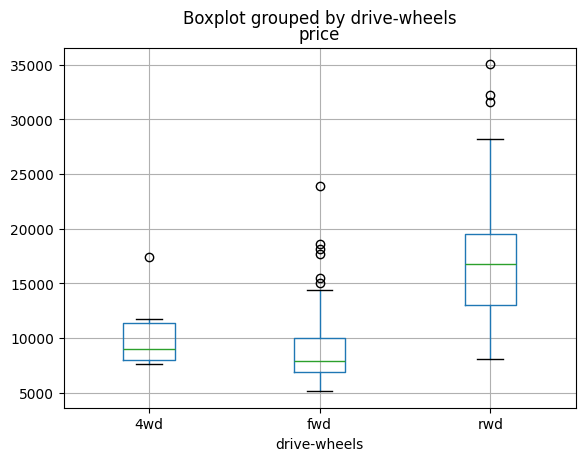

In [102]:
df.boxplot(column='price', by='drive-wheels')

<Axes: xlabel='drive-wheels', ylabel='price'>

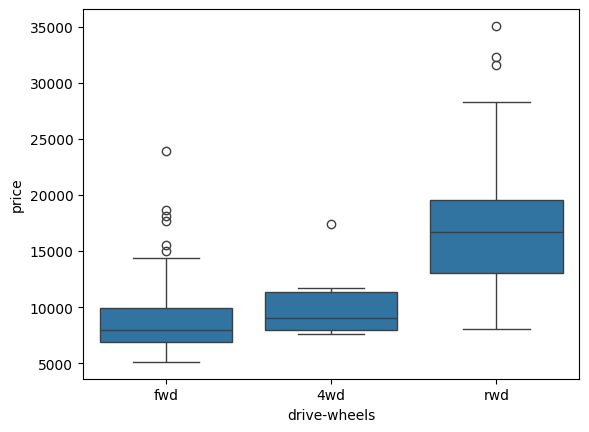

In [103]:
sns.boxplot(x='drive-wheels', y='price', data=df)

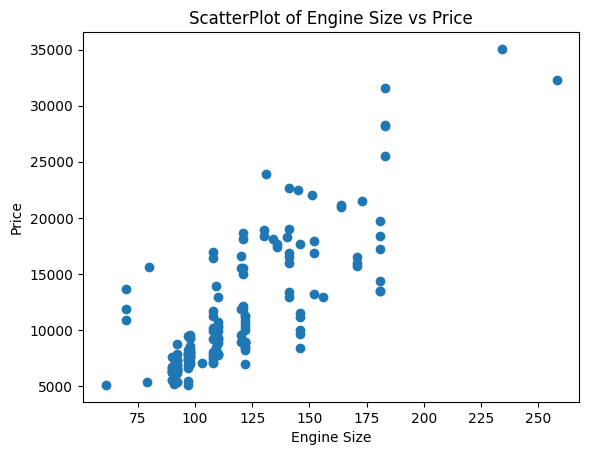

In [104]:
#scatter plot
y= df['price']
x= df['engine-size']
plt.scatter(x,y)
plt.title('ScatterPlot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [106]:
df_test= df[['drive-wheels','body-style','price']]
df_grp = df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,hardtop,8249.000000
4,fwd,hatchback,7989.800000
5,fwd,sedan,9538.509804
6,fwd,wagon,8829.222222
7,rwd,convertible,26362.500000
8,rwd,hardtop,14365.750000
9,rwd,hatchback,14376.071429


In [107]:
df_pivot = df_grp.pivot(index='drive-wheels',columns='body-style')
df_pivot

price                                                    
body-style   convertible   hardtop     hatchback         sedan         wagon
drive-wheels                                                                
4wd                  NaN       NaN   7603.000000  12647.333333   9095.750000
fwd                  NaN   8249.00   7989.800000   9538.509804   8829.222222
rwd              26362.5  14365.75  14376.071429  18318.576923  19282.000000

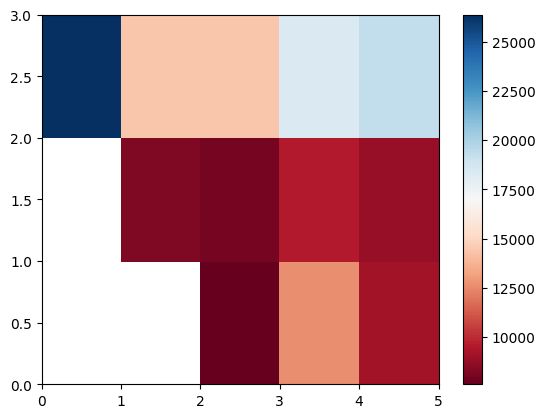

In [108]:
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

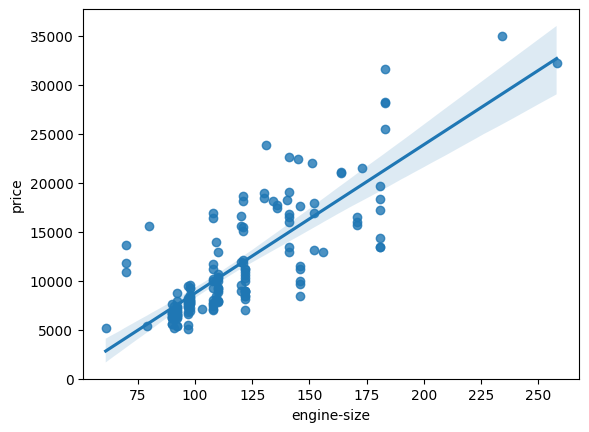

In [109]:
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)
plt.show()

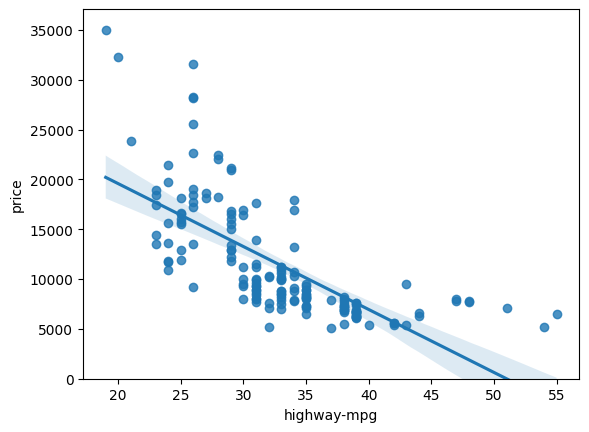

In [110]:
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)
plt.show()

# Pearson Correlation (scipy library)
تبدیل ستون‌های `horsepower` و `price` به مقادیر عددی و حذف ردیف‌هایی که مقدار ندارند

In [112]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # تبدیل مقادیر غیر عددی به NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # تبدیل مقادیر غیر عددی به NaN
df.dropna(subset=['horsepower', 'price'], inplace=True)  # حذف ردیف‌هایی که مقدار `horsepower` یا `price` آنها NaN است

In [119]:
# محاسبه ضریب همبستگی پیرسون و مقدار p-value
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('pearson correlation:',pearson_coef,'\tp-value:',p_value)

pearson correlation: 0.7590399422168685 	p-value: 5.238442061720588e-32
